In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2708,2709,15667190,Yuan,630,Spain,Female,21,1,85818.18,1,1,1,133102.30,0
6170,6171,15611157,McElhone,709,France,Female,32,2,87814.89,1,1,0,138578.37,0
3306,3307,15633854,Sun,654,France,Female,40,3,0.00,2,1,0,167889.10,0
928,929,15677135,Lorenzo,520,Germany,Male,61,8,133802.29,2,1,1,90304.01,0
8251,8252,15751032,Enemuo,629,Germany,Female,37,1,35549.81,2,0,0,49676.33,0


In [3]:
df.drop('RowNumber', axis='columns', inplace=True)
df.drop('CustomerId', axis='columns', inplace=True)
df.drop('Surname', axis='columns', inplace=True)

In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8908,593,Spain,Male,32,10,158537.42,1,1,0,166850.57,0
8466,613,France,Male,36,9,131307.11,1,0,0,83343.73,0
9664,726,Germany,Male,30,7,92847.59,1,1,0,146154.06,0
4231,628,France,Male,36,3,0.00,2,1,1,8742.91,0
9352,667,France,Male,40,8,72945.29,2,1,0,98931.50,0


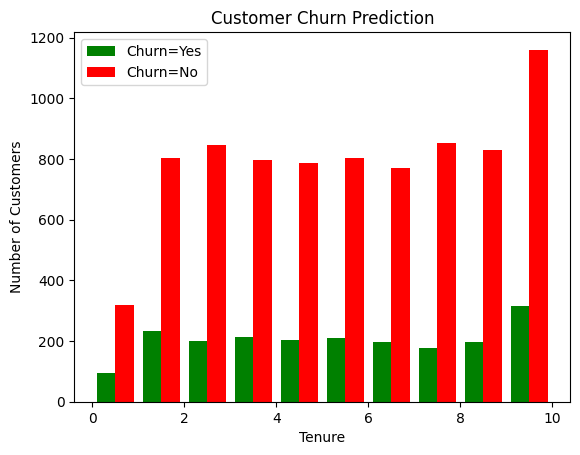

In [6]:
tenure_churn_no = df[df.Exited == 0].Tenure
tenure_churn_yes = df[df.Exited == 1].Tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [7]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [8]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [9]:
df['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [10]:
df = pd.get_dummies(data=df, columns=['Geography'])

In [11]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [12]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3453,619,0,40,9,103604.31,2,0,0,140947.05,0,False,True,False
5417,588,0,32,1,0.00,2,1,1,8763.87,0,True,False,False
734,545,1,60,7,128981.07,1,0,1,176924.21,1,False,True,False
7664,602,0,35,8,0.00,1,1,1,22499.29,0,True,False,False
145,485,1,21,5,113157.22,1,1,1,54141.50,0,False,False,True


In [13]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', ]

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [15]:
X = df.drop('Exited', axis='columns')
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [17]:
X_train.shape

(8000, 12)

In [18]:
X_test.shape

(2000, 12)

In [19]:
import tensorflow as tf
from tensorflow import keras

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5443 - accuracy: 0.7761
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7980
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4538 - accuracy: 0.8040
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8094
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8133
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8164
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8232
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8295
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8357
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3737 - accura

In [25]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8540


[0.34942272305488586, 0.8539999723434448]

In [27]:
y_pred = model.predict(X_test)
y_pred[:5]

63/63 [==============================] - 0s 2ms/step


array([[0.02792997],
       [0.07460218],
       [0.08309216],
       [0.08863255],
       [0.0876291 ]], dtype=float32)

In [28]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [29]:
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      1595
         1.0       0.70      0.49      0.58       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

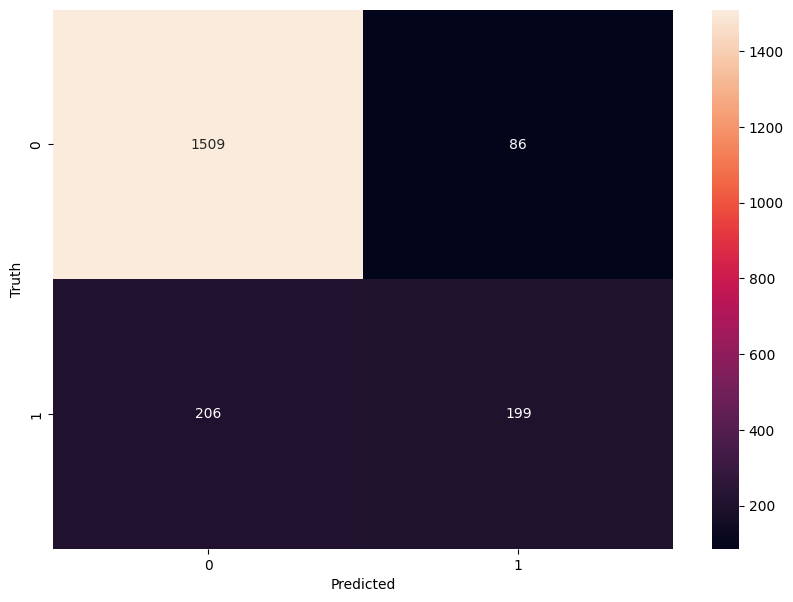

In [31]:
import seaborn as sn
cn = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
sn.heatmap(cn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')